In [67]:
import numpy as np

A = np.array([[65,72], [72,82]])
A_T = A.transpose()

l = np.linalg.eigvals(np.matmul(A_T, A))

np.linalg.eig(np.matmul(A, A_T))


EigResult(eigenvalues=array([1.0000e+00, 2.1316e+04]), eigenvectors=array([[-0.74740932, -0.66436384],
       [ 0.66436384, -0.74740932]]))

In [68]:
0.01*21316

213.16

**4 задача**



In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

def create_system(n=100, a=10, b=10):
    """Создание матрицы A и вектора b"""
    A = np.zeros((n, n))
    b_vec = np.arange(1, n+1, dtype=float)
    
    # Заполнение матрицы A согласно системе уравнений
    for i in range(n):
        if i == 0:
            A[i, 0] = a
            A[i, 1] = 1
            if n > 2:
                A[i, 2] = 1/b
        elif i == n-1:
            A[i, n-2] = 1
            A[i, n-1] = a
        elif i == n-2:
            A[i, n-3] = 1
            A[i, n-2] = a
            A[i, n-1] = 1
        else:
            A[i, i-1] = 1
            A[i, i] = a
            A[i, i+1] = 1
            if i + 2 < n:
                A[i, i+2] = 1/b
    
    return A, b_vec

In [70]:

def minimal_residual_method(A, b, eps=1e-15, max_iter=10000):
    '''Метод минимальных невязок'''
    n = len(b)
    x = np.zeros(n)
    r = b - A @ x
    b_norm = np.linalg.norm(b)
    
    tau_history = []
    residual_history = []
    
    print(f"Начальная невязка: {np.linalg.norm(r)/b_norm:.2e}")
    
    for k in range(max_iter):
        Ar = A @ r
        
        # Оптимальный параметр τ
        numerator = np.dot(r, Ar)
        denominator = np.dot(Ar, Ar)
        
        if abs(denominator) < 1e-15:
            break
        
        tau_k = numerator / denominator
        tau_history.append(tau_k)
        
        # Коррекция решения
        x = x + tau_k * r
        
        # Обновление невязки
        r = r - tau_k * Ar
        
        # Проверка сходимости
        residual_norm = np.linalg.norm(r)
        relative_residual = residual_norm / b_norm
        residual_history.append(relative_residual)
        
        if k % 100 == 0:
            print(f"Итерация {k}: невязка = {relative_residual:.2e}, τ = {tau_k:.6f}")
        
        if relative_residual < eps:
            print(f"Достигнута точность на итерации {k}")
            break
    
    return x, tau_history, residual_history, k+1


In [71]:
# def minimal_residual_method_extended_precision(A, b, eps=1e-15, max_iter=50000):
#     """Метод с расширенной диагностикой"""
#     n = len(b)
#     x = np.zeros(n, dtype=np.float64)
#     r = b - A @ x
#     b_norm = np.linalg.norm(b)
    
#     tau_history = []
#     residual_history = []
#     solution_change_history = []
    
#     print(f"Целевая точность: {eps:.1e}")
    
#     for k in range(max_iter):
#         Ar = A @ r
        
#         numerator = np.dot(r, Ar)
#         denominator = np.dot(Ar, Ar)
        
#         tau_k = numerator / denominator
#         tau_history.append(tau_k)
        
#         x_prev = x.copy()
#         x = x + tau_k * r
#         r = r - tau_k * Ar
        
#         residual_norm = np.linalg.norm(r)
#         relative_residual = residual_norm / b_norm
#         residual_history.append(relative_residual)
        
#         # Изменение решения
#         dx_norm = np.linalg.norm(x - x_prev) / max(1, np.linalg.norm(x))
#         solution_change_history.append(dx_norm)
        
#         # Проверяем несколько критериев остановки
#         stop_reason = ""
#         if relative_residual < eps:
#             stop_reason = "достигнута требуемая невязка"
#         elif dx_norm < 1e-16:  # Решение перестало меняться
#             stop_reason = "решение перестало меняться"
#         elif k > 100 and abs(tau_k - tau_history[-10]) < 1e-16:  # τ стабилизировался
#             stop_reason = "параметр τ стабилизировался"
        
#         if stop_reason and relative_residual < 1e-10:
#             print(f"Остановка на итерации {k}: {stop_reason}")
#             print(f"Финальная невязка: {relative_residual:.2e}")
#             print(f"Изменение решения: {dx_norm:.2e}")
#             break
            
#         if k == max_iter - 1:
#             print(f"Достигнут максимум итераций: {max_iter}")
    
#     return x, tau_history, residual_history, solution_change_history, k+1

# minimal_residual_method_extended_precision(A, b)

In [72]:

def power_method(A, eps=1e-15, max_iter=1000):
    """Степенной метод для λ_max"""
    n = A.shape[0]
    v = np.random.rand(n)
    v = v / np.linalg.norm(v)
    
    lambda_prev = 0
    
    for i in range(max_iter):
        Av = A @ v
        lambda_est = np.dot(v, Av)
        v_new = Av / np.linalg.norm(Av)
        
        # Критерий остановки по изменению λ
        if abs(lambda_est - lambda_prev) < eps:
            break
            
        lambda_prev = lambda_est
        v = v_new
    
    return lambda_est


In [73]:
def inverse_power_method(A, eps=1e-15, max_iter=1000):
    """Обратные итерации для λ_min"""
    n = A.shape[0]
    v = np.random.rand(n)
    v = v / np.linalg.norm(v)
    
    lambda_prev = 0
    
    try:
        # Используем LU-разложение для эффективного решения
        LU = linalg.lu_factor(A)
        
        for i in range(max_iter):
            # Решаем A*v_new = v
            v_new = linalg.lu_solve(LU, v)
            lambda_est = np.linalg.norm(v_new)
            v_new = v_new / lambda_est
            
            # λ_min ≈ 1/‖v_new‖
            lambda_min_est = 1 / lambda_est
            
            if i > 0 and abs(lambda_min_est - lambda_prev) < eps:
                break
                
            lambda_prev = lambda_min_est
            v = v_new
            
        return lambda_min_est
        
    except:
        # Если LU-разложение не работает, используем прямой метод
        print("LU-разложение не удалось, используем прямой метод")
        try:
            A_inv = np.linalg.inv(A)
            return power_method(A_inv)  # λ_min = 1/λ_max(A_inv)
        except:
            # Если и это не работает, используем встроенную функцию
            eigvals = np.linalg.eigvals(A)
            return np.min(np.abs(eigvals))

In [74]:
def estimate_condition_number(A):
    """Оценка числа обусловленности"""
    print("Вычисление λ_max...")
    lambda_max = power_method(A)
    print(f"λ_max = {lambda_max:.6f}")
    
    print("Вычисление λ_min...")
    lambda_min = inverse_power_method(A)
    print(f"λ_min = {lambda_min:.6f}")
    
    kappa = lambda_max / lambda_min
    return kappa, lambda_max, lambda_min

Создание системы...
Размер матрицы: (100, 100)
Норма матрицы A: 100.990000

Оценка числа обусловленности...
Вычисление λ_max...
λ_max = 12.097604
Вычисление λ_min...
λ_min = 8.102266
Число обусловленности κ(A) ≈ 1.49

Решение методом минимальных невязок...
Начальная невязка: 1.00e+00
Итерация 0: невязка = 1.56e-02, τ = 0.082849

Результаты:
Всего итераций: 15
Финальная относительная невязка: 1.26e-12
Норма решения: 48.224797
Проверка невязки: 1.26e-12


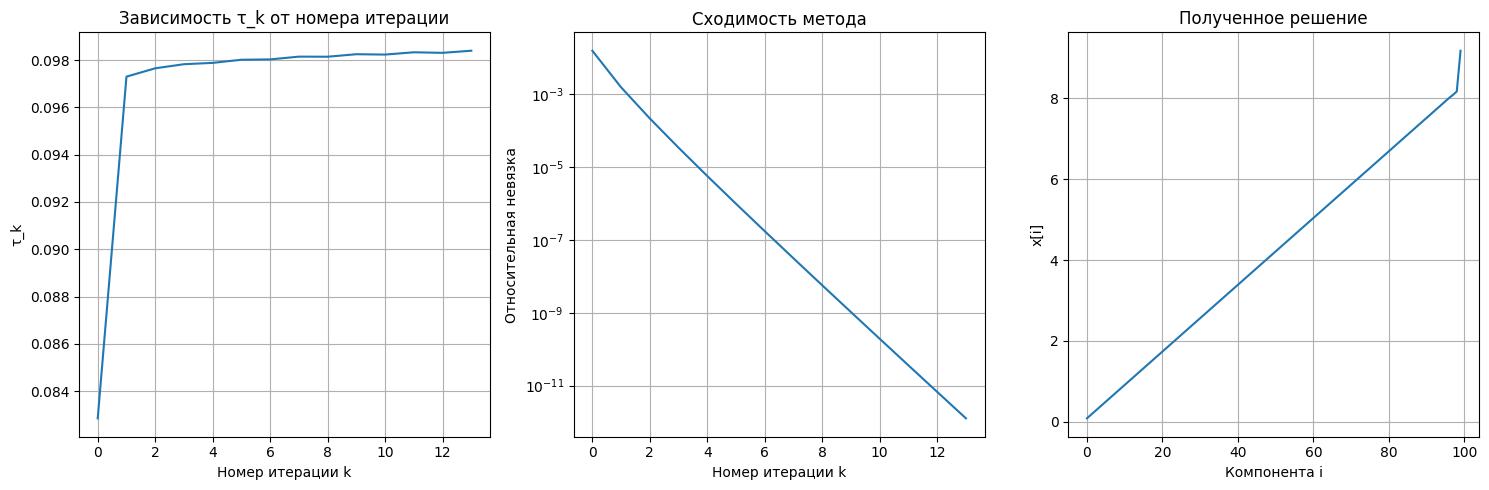


Анализ поведения τ_k:
Начальное значение τ: 0.082849
Конечное значение τ: 0.098393
Среднее значение τ: 0.096951
Стандартное отклонение τ: 0.003922
Теоретическое оптимальное τ: 0.099011


In [75]:
# Основная программа
print("Создание системы...")
A, b = create_system()

print(f"Размер матрицы: {A.shape}")
print(f"Норма матрицы A: {np.linalg.norm(A):.6f}")

# Оценка числа обусловленности
print("\nОценка числа обусловленности...")
kappa, lambda_max, lambda_min = estimate_condition_number(A)
print(f"Число обусловленности κ(A) ≈ {kappa:.2f}")

# Решение методом минимальных невязок
print("\nРешение методом минимальных невязок...")
x_sol, tau_hist, res_hist, iterations = minimal_residual_method(A, b, eps=1e-15)

print(f"\nРезультаты:")
print(f"Всего итераций: {iterations}")
print(f"Финальная относительная невязка: {res_hist[-1]:.2e}")
print(f"Норма решения: {np.linalg.norm(x_sol):.6f}")

# Проверка решения
residual_check = np.linalg.norm(b - A @ x_sol) / np.linalg.norm(b)
print(f"Проверка невязки: {residual_check:.2e}")

# Построение графиков
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(tau_hist)
plt.xlabel('Номер итерации k')
plt.ylabel('τ_k')
plt.title('Зависимость τ_k от номера итерации')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.semilogy(res_hist)
plt.xlabel('Номер итерации k')
plt.ylabel('Относительная невязка')
plt.title('Сходимость метода')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(x_sol)
plt.xlabel('Компонента i')
plt.ylabel('x[i]')
plt.title('Полученное решение')
plt.grid(True)

plt.tight_layout()
plt.show()

# Анализ поведения τ_k
print("\nАнализ поведения τ_k:")
print(f"Начальное значение τ: {tau_hist[0]:.6f}")
print(f"Конечное значение τ: {tau_hist[-1]:.6f}")
print(f"Среднее значение τ: {np.mean(tau_hist):.6f}")
print(f"Стандартное отклонение τ: {np.std(tau_hist):.6f}")

# Теоретическое значение τ для сходимости
tau_theoretical = 2 / (lambda_max + lambda_min)
print(f"Теоретическое оптимальное τ: {tau_theoretical:.6f}")